In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb


In [3]:
df=pd.read_csv('Titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


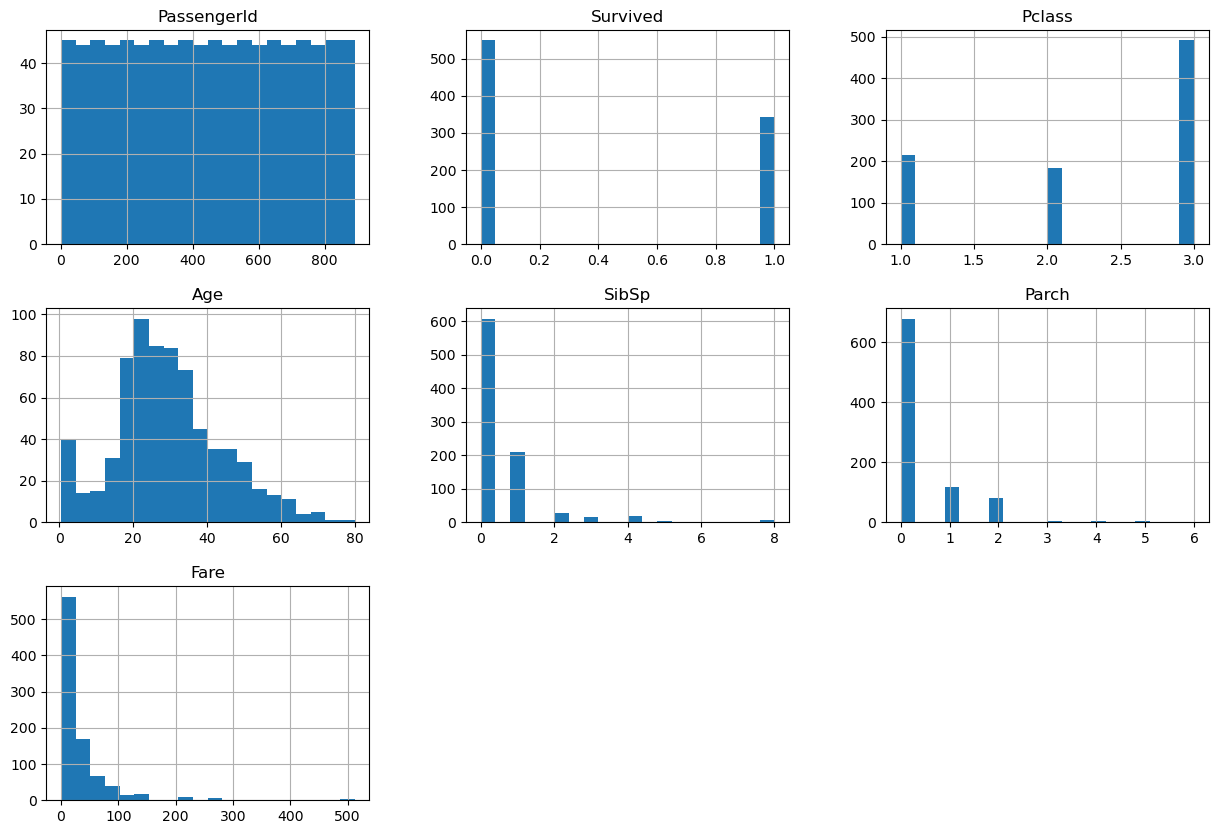

In [13]:
#Histograms for Numerical Features:

df.hist(bins=20, figsize=(15, 10))
plt.show()



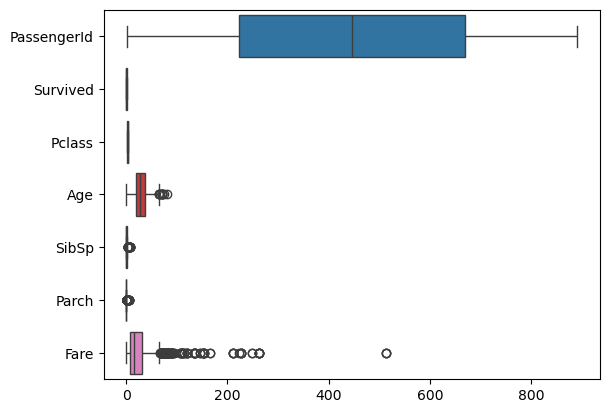

In [17]:
#Box Plots to Analyze Outliers:
sns.boxplot(data=df, orient='h')
plt.show()



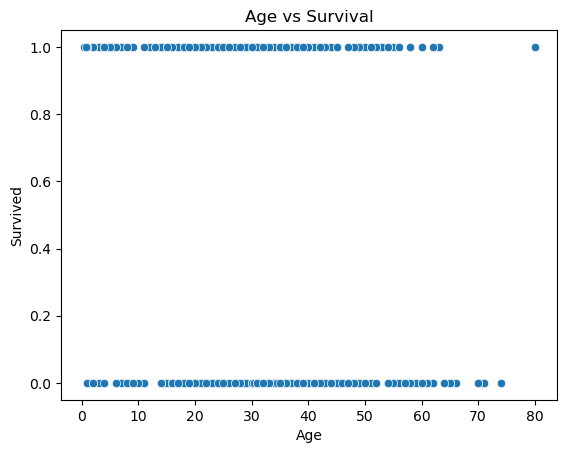

In [21]:
#Visualize Relationships with "Survival 
#Scatter Plot (Age vs Survival):
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title("Age vs Survival")
plt.show()


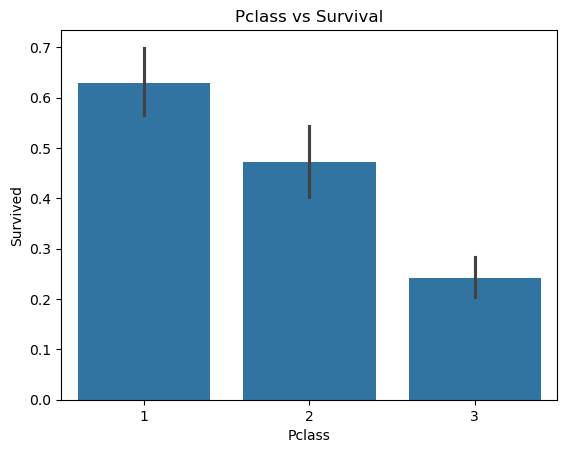

In [25]:
#Bar Plot (Pclass vs Survival):
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Pclass vs Survival")
plt.show()


In [35]:
#Impute Missing Values

#Fill Missing Age with Median: 
df['Age'].fillna(df['Age'].median(), inplace=True)
#Fill Missing Embarked with Mode: 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

import warnings
warnings.filterwarnings("ignore")

In [37]:
# Encode categorical variables
label_enc = LabelEncoder()
df["Sex"] = label_enc.fit_transform(df["Sex"])
df["Embarked"] = label_enc.fit_transform(df["Embarked"])


In [41]:
#One-Hot Encode 'Embarked' 

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [45]:
#Drop Unnecessary Columns 

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [49]:
#Split the Dataset  

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
####Build and Evaluate Models

LightGBM Model

In [56]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1-Score:", f1_score(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBoost Model

In [59]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1-Score: 0.7777777777777778


In [61]:
#LightGBM Hyperparameter Tuning 
# Define parameter grid
lgb_params = {"num_leaves": [31, 50], "max_depth": [10, 20], "learning_rate": [0.1, 0.01]}

# Perform grid search
lgb_grid = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_grid=lgb_params, cv=5, scoring="accuracy")
lgb_grid.fit(X_train, y_train)

# Best parameters
print("Best LightGBM Parameters:", lgb_grid.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [63]:
#XGBoost Hyperparameter Tuning 

# Define parameter grid
xgb_params = {"max_depth": [3, 5], "learning_rate": [0.1, 0.01], "n_estimators": [100, 200]}

# Perform grid search
xgb_grid = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"), 
                        param_grid=xgb_params, cv=5, scoring="accuracy")
xgb_grid.fit(X_train, y_train)

# Best parameters
print("Best XGBoost Parameters:", xgb_grid.best_params_)

import warnings
warnings.filterwarnings("ignore")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


      Metric  LightGBM   XGBoost
0   Accuracy  0.826816  0.821229
1  Precision  0.794521  0.800000
2     Recall  0.783784  0.756757
3   F1-Score  0.789116  0.777778


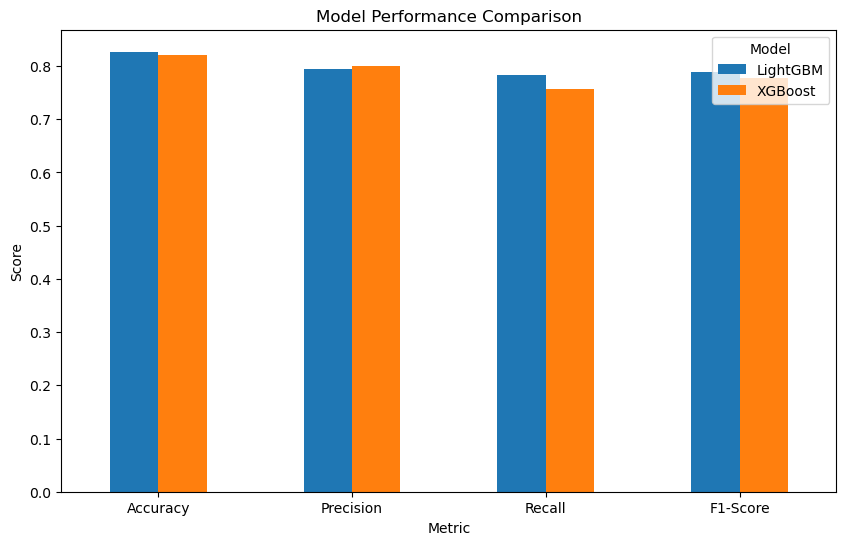

In [65]:
#Comparative Analysis 


# Collect metrics
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "LightGBM": [accuracy_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_lgb), 
                 recall_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_lgb)],
    "XGBoost": [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), 
                recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)]
})

# Display metrics
print(metrics)

# Visualization
metrics.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Model")
plt.show()
